# One-layer neural network on CIFAR-10

## Imports

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split

## Load data

In [13]:
(x_train_val, y_train_val), (x_test, y_test) = cifar10.load_data()

In [17]:
# 1-fold cross val
val_size = 5000
x_train, x_val, y_train, y_val = \
    train_test_split(x_train_val, y_train_val, stratify=y_train_val, test_size=val_size, random_state=1234)

In [34]:
# check counts in datasets
print(f"train set shape: {x_train.shape}, val set shape: {x_val.shape}, test set shape: {x_test.shape}")
print(f"train labels shape: {y_train.shape},"
      f" val labels shape: {y_val.shape}, test labels shape: {y_test.shape}")

# assert balanced dataset
train_counts = np.unique(y_train, return_counts=True)[1]
train_ratios = train_counts / train_counts.sum()

val_counts = np.unique(y_val, return_counts=True)[1]
val_ratios = val_counts / val_counts.sum()

test_counts = np.unique(y_test, return_counts=True)[1]
test_ratios = test_counts / test_counts.sum()

np.testing.assert_array_equal(train_ratios, val_ratios)
np.testing.assert_array_equal(val_ratios, test_ratios)

train set shape: (45000, 32, 32, 3), val set shape: (5000, 32, 32, 3), test set shape: (10000, 32, 32, 3)
train labels shape: (45000, 1), val labels shape: (5000, 1), test labels shape: (10000, 1)


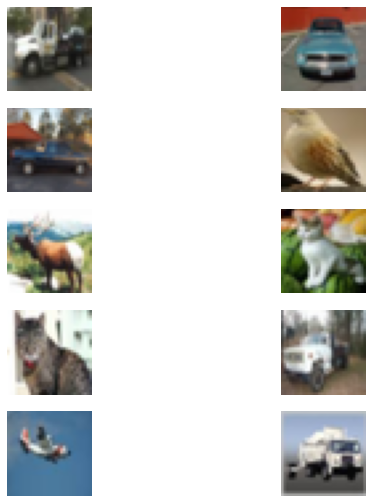

In [65]:
# show some random pics

show_n = 10
assert show_n % 2 == 0, f"{show_n} needs to be an even number"
np.random.seed(100)
show_indices = np.random.choice(x_train.shape[0], show_n, replace=False)
x_train_show = x_train[show_indices]

fig, axs = plt.subplots(show_n // 2, 2,figsize=(9,9))

for idx, img in enumerate(x_train_show):
    ax = axs[idx // 2, col_idx]
    col_idx = 1 - int(idx % 2 == 0)
    ax.imshow(img)
    ax.axis('off')

plt.show()

## Neural network

In [ ]:
class 